-- 핵심 목표 : Feature Engineering 

# 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 데이터 불러오기

In [4]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2022/Python 데이터 분석 라이브러리_20220423/Basic/Machine Learning/House Price/data/'
train = pd.read_csv(DATA_PATH + "train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test = pd.read_csv(DATA_PATH + "test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- 머신러닝 절차 
- 훈련데이터를 활용해서 학습 (모델링)
  + 패턴 발견 (Y값 기준) / 종속변수
- 테스트데이터를 활용해서 예측
  + Y값 존재 (X)

## 데이터 확인하기
- 부동산 가격 예측하는 것이 과제
- 부동산 가격에 해당하는 종속변수 존재 (SalePrice)

In [6]:
train.shape, test.shape

((1460, 81), (1459, 80))

# Feature Engineering
- Data Preprocessing : 이상치 제거, 결측치 제거
- Feature Engineering : 인코딩 변환, 왜도 처리하기, 새로운 변수 가공

## 결측치 확인

In [7]:
train.info() # test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- 이상치 제거
  + OverallQual, SalePrice
  + 질은 떨어지는데, 가격이 높음
  + 행 또는 열 제거 시, drop() 메서드 

In [11]:
train[(train['OverallQual'] < 4) & (train['SalePrice'] > 100000)].index

Int64Index([74, 323, 449, 1045, 1404], dtype='int64')

In [12]:
print("before: ", train.shape)
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']> 100000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print("after: ", train.shape)

before:  (1460, 81)
after:  (1455, 81)


### 종속변수의 로그 변환
- 수치 데이터의 정규분포 확인 후, 로그변환 적용

The value of mu before log transformation is: 181131.80137457044
The value of sigma before log transformation is: 79466.69935176395


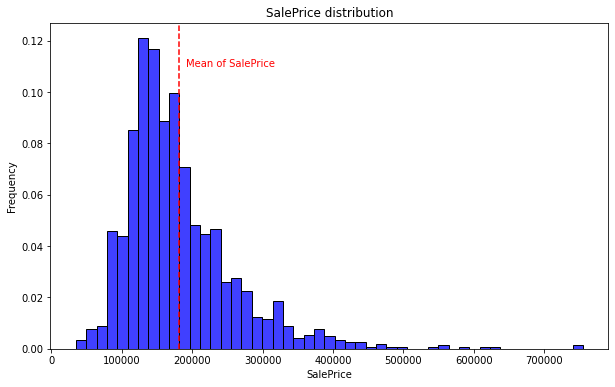

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
plt.show()

- 로그 변환

The value of mu before log transformation is: 12.025216848544066
The value of sigma before log transformation is: 0.3994595223123619


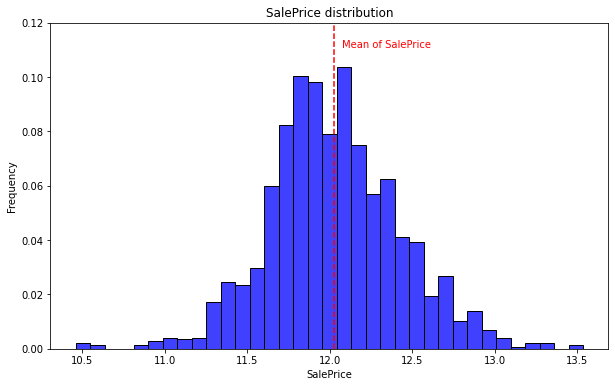

In [14]:
import numpy as np 

train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
plt.show()

### 데이터 ID값 제거
훈련 : 키와 몸무게를 성별 예측
테스트 : 키, 몸무게, 식단 가지고 성별 예측

In [ ]:
train_ID = train['Id']
test_ID = test['Id']

train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

train.shape, test.shape

### Y값 추출
- 이번에는 Y값만 별도로 추출 / 나중에 활용 (모형평가 시)

In [15]:
y = train['SalePrice'].reset_index(drop=True)
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1455, 80), (1459, 80), (1455,))

### 데이터 합치기

In [16]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2914, 80)

- 결측치 제거
  + 결측치의 비율을 확인하는 함수
  + 결측치 확인 후, 어떤 변수들을 삭제할 것인지 정한다.

In [22]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({"Missing Ratio" : data_na, 
                               "Data Type" : data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 30)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.656829    object
MiscFeature       96.396706    object
Alley             93.239533    object
Fence             80.439259    object
FireplaceQu       48.592999    object
LotFrontage       16.643789   float64
GarageFinish       5.456417    object
GarageQual         5.456417    object
GarageCond         5.456417    object
GarageYrBlt        5.456417   float64
GarageType         5.387783    object
BsmtExposure       2.779684    object
BsmtCond           2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
Functional         0.068634    object
Utilities          0.068634    object
GarageArea         0.034317   float64
GarageCars         0.034317   flo

- 결측치 비율이 높은 변수들은 모두 제거

In [25]:
# all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)
check_na(all_df, 10)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object
BsmtExposure       2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object


### 결측치 채우기
- 결측치를 채우는 방법은 매우 다양하다. 
- 빈도가 높은 순으로 데이터를 대치한다. 

In [34]:
print(all_df['BsmtCond'].value_counts())
print()
print(all_df['BsmtCond'].mode()[0])

TA    2602
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

TA


In [35]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2914 non-null   int64  
 1   MSSubClass     2914 non-null   int64  
 2   MSZoning       2910 non-null   object 
 3   LotArea        2914 non-null   int64  
 4   Street         2914 non-null   object 
 5   LotShape       2914 non-null   object 
 6   LandContour    2914 non-null   object 
 7   Utilities      2912 non-null   object 
 8   LotConfig      2914 non-null   object 
 9   LandSlope      2914 non-null   object 
 10  Neighborhood   2914 non-null   object 
 11  Condition1     2914 non-null   object 
 12  Condition2     2914 non-null   object 
 13  BldgType       2914 non-null   object 
 14  HouseStyle     2914 non-null   object 
 15  OverallQual    2914 non-null   int64  
 16  OverallCond    2914 non-null   int64  
 17  YearBuilt      2914 non-null   int64  
 18  YearRemo

- 컬럼명 갯수
  + 조건 1. 문자열 컬럼 (38) 추출
  + 조건 2. 결측치가 존재하는 컬럼 추출
    + 결측치 비율이 10% 이상인 것 이미 제거를 한 상태
  + 조건 3. 결측치를 채워야 함 (빈도수)

In [36]:
import numpy as np

# 문자열 데이터만 추출
cat_all_vars = all_df.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

# 문자열 데이터 중에서 이미 기 삭제했던 Feature들이 있었기 때문에, 
# 한번 더 Feature를 정리하는 코드를 작성한다. 
# 따라서 38개의 Feature만 추출했다. 
final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))

# 이제 각 Feature 마다 빈도수가 가장 많이 나타나는 값을 추가하는 코드를 작성한다. 
for i in final_cat_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

# 이제 수치형 데이터만 남은 것을 확인한다. 
check_na(all_df, 20)

The whole number of all_vars 38
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.456417   float64
MasVnrArea         0.789293   float64
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
BsmtFinSF1         0.034317   float64
BsmtFinSF2         0.034317   float64
BsmtUnfSF          0.034317   float64
TotalBsmtSF        0.034317   float64
GarageCars         0.034317   float64
GarageArea         0.034317   float64


- 수치형 데이터만 추출한다.
- 중간값으로 데치한다. 

In [37]:
import numpy as np

# 방법은 기존과 동일하다. 
# 이번에는 수치형 데이터만 추출한다. 
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

# 수치형 데이터 중, 결측치가 많았던 `LotFrontage`만 처리한다. 
num_all_vars.remove('LotFrontage')
print("The whole number of final_cat_vars", len(num_all_vars))

# 이번에는 수치형 데이터의 평균이 아닌 중간값을 지정했다. 
for i in num_all_vars:
  all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 37
The whole number of final_cat_vars 36
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [38]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2914 non-null   int64  
 1   MSSubClass     2914 non-null   int64  
 2   MSZoning       2914 non-null   object 
 3   LotArea        2914 non-null   int64  
 4   Street         2914 non-null   object 
 5   LotShape       2914 non-null   object 
 6   LandContour    2914 non-null   object 
 7   Utilities      2914 non-null   object 
 8   LotConfig      2914 non-null   object 
 9   LandSlope      2914 non-null   object 
 10  Neighborhood   2914 non-null   object 
 11  Condition1     2914 non-null   object 
 12  Condition2     2914 non-null   object 
 13  BldgType       2914 non-null   object 
 14  HouseStyle     2914 non-null   object 
 15  OverallQual    2914 non-null   int64  
 16  OverallCond    2914 non-null   int64  
 17  YearBuilt      2914 non-null   int64  
 18  YearRemo

### 왜도 처리하기

In [39]:
from scipy.stats import skew

def find_skew(x):
  return skew(x)

skewness_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skewness_features

MiscVal          21.928383
PoolArea         16.883698
LotArea          12.817577
LowQualFinSF     12.078203
3SsnPorch        11.366100
KitchenAbvGr      4.316357
BsmtFinSF2        4.142042
EnclosedPorch     4.019921
ScreenPorch       3.942711
BsmtHalfBath      3.927598
MasVnrArea        2.610910
OpenPorchSF       2.538734
WoodDeckSF        1.842626
1stFlrSF          1.471175
BsmtFinSF1        1.423690
MSSubClass        1.373564
GrLivArea         1.268174
TotalBsmtSF       1.166820
BsmtUnfSF         0.920694
2ndFlrSF          0.862272
TotRmsAbvGrd      0.759082
Fireplaces        0.732140
HalfBath          0.693438
BsmtFullBath      0.623599
OverallCond       0.571076
BedroomAbvGr      0.326914
GarageArea        0.238810
OverallQual       0.206317
MoSold            0.196270
FullBath          0.167065
YrSold            0.131984
Id               -0.001890
GarageCars       -0.220598
GarageYrBlt      -0.397630
YearRemodAdd     -0.452230
YearBuilt        -0.602844
dtype: float64

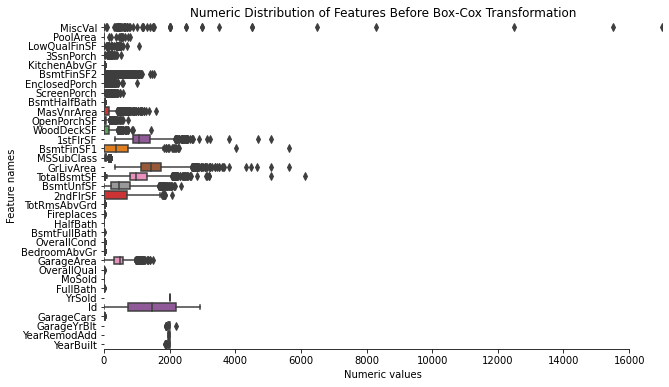

In [40]:
skewnewss_index = list(skewness_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax = sns.boxplot(data=all_numeric_df[skewnewss_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

In [41]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# 왜도가 1보다 높은 수치형 변수를 출력하는 코드
high_skew = skewness_features[skewness_features > 1]
high_skew_index = high_skew.index

print("The data before Box-Cox Transformation: \n", all_df[high_skew_index].head())

# boxcox를 변환하는 코드
for num_var in high_skew_index:
  all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var] + 1))

print("The data after Box-Cox Transformation: \n", all_df[high_skew_index].head())

The data before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61         

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


The data after Box-Cox Transformation: 
    MiscVal  PoolArea    LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0      0.0       0.0  13.441162           0.0        0.0      0.751165   
1      0.0       0.0  13.711769           0.0        0.0      0.751165   
2      0.0       0.0  14.052143           0.0        0.0      0.751165   
3      0.0       0.0  13.700638           0.0        0.0      0.751165   
4      0.0       0.0  14.569342           0.0        0.0      0.751165   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0       0.000000          0.0      0.000000   19.403768   
1         0.0       0.000000          0.0      0.711023    0.000000   
2         0.0       0.000000          0.0      0.000000   17.743120   
3         0.0      15.916956          0.0      0.000000    0.000000   
4         0.0       0.000000          0.0      0.000000   25.360528   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0    12.0003

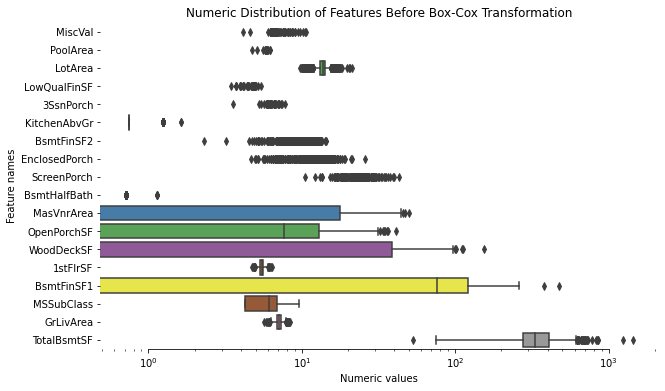

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax = sns.boxplot(data=all_df[high_skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

- 

## 도출변수
- 데이터 전처리의 꽃
- 통계 / 머신러닝 
  + 통계 : 변수간의 관계를 파악하는 데 주 목적
  + 머신러닝 : 변수를 활용하여 Y값을 예측하는 것이 주 목적
  + 최종적인 목적 : Y값에 직접적으로 영향을 끼치는 특정 변수를 찾는 것! 
- 지수화 ==> 수식

- 각 층의 면적을 모두 더해 전체 면적으로 계산한 새로운 변수를 작성한다. ㅇ
  + 대표성이 있는 새로운 도출변수를 만듬 --> 활용된 변수는 제거
  + 머신러닝 연산 속도를 끌어 올리기 위해

In [45]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
print(all_df.shape)

(2914, 72)


In [46]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2914, 66)


- 수치 데이터에서 연도만 추출함

In [47]:
num_all_vars = list(all_df.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:  
    print(var, "is not related with Year")
print(year_feature)

Id is not related with Year
MSSubClass is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
PoolArea is not related with Year
MiscVal is not related with Year
MoSold is not related with Year
TotalSF is not related with Year
Total_Bathrooms is not related with Year
Total_porch_sf is not related with Year
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


- 연도가 최근일수록 주택가격은 상승하고 있다. 

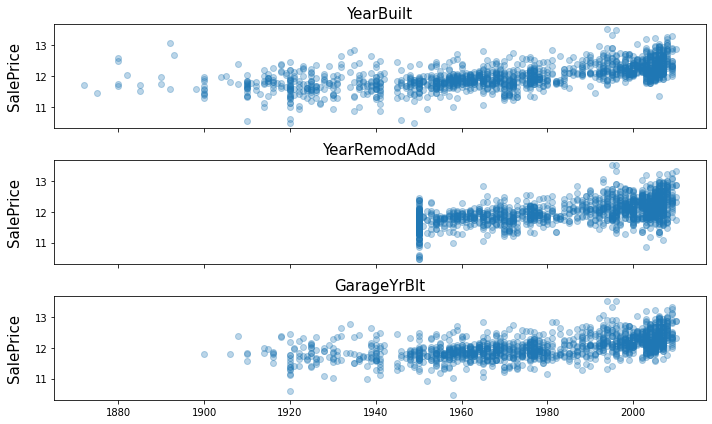

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var], y, alpha=0.3)
    ax[i].set_title('{}'.format(var), size=15)
    ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

In [49]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2914, 64)


- 판매시기를 기점으로 리모델링이 최근에 이뤄질수록 가격이 높았다. 


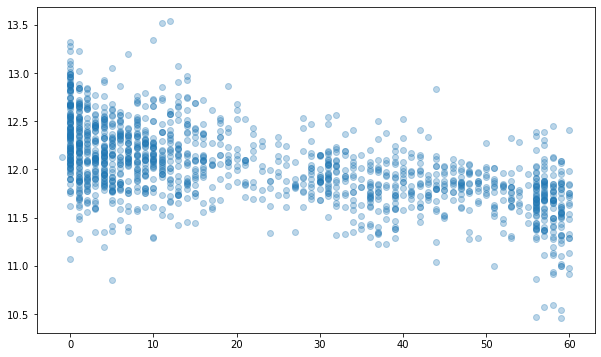

In [50]:
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)
plt.show()

In [51]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2914, 63)


## 더미변수 
- High Cardinality 
- 0 (90%), 1(5%)
- 이진화

In [52]:
all_df['PoolArea'].value_counts()

0.000000    2901
5.844393       1
6.049845       1
5.947237       1
5.914833       1
5.787942       1
5.856262       1
6.162866       1
4.722721       1
5.554803       1
5.719656       1
5.131878       1
5.924217       1
6.232823       1
Name: PoolArea, dtype: int64

- dummy 함수
  + 0보다 작으면 0으로 변환
  + 그 외에는 1로 변환

In [53]:
def count_dummy(x):
  if x > 0:
    return 1 
  else: 
    return 0


In [54]:
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

0    2901
1      13
Name: PoolArea, dtype: int64

In [55]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2757
0     157
Name: GarageArea, dtype: int64

In [56]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1498
0    1416
Name: Fireplaces, dtype: int64

- 개별적인 데이터 특성에 따라 데이터를 처리

In [57]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 2914 non-null   int64  
 1   MSSubClass         2914 non-null   float64
 2   MSZoning           2914 non-null   object 
 3   LotArea            2914 non-null   float64
 4   Street             2914 non-null   object 
 5   LotShape           2914 non-null   object 
 6   LandContour        2914 non-null   object 
 7   Utilities          2914 non-null   object 
 8   LotConfig          2914 non-null   object 
 9   LandSlope          2914 non-null   object 
 10  Neighborhood       2914 non-null   object 
 11  Condition1         2914 non-null   object 
 12  Condition2         2914 non-null   object 
 13  BldgType           2914 non-null   object 
 14  HouseStyle         2914 non-null   object 
 15  OverallQual        2914 non-null   int64  
 16  OverallCond        2914 

- 문자열이 있으면 머신러닝 알고리즘에 학습 불가! 
- 머신러닝 알고리즘 = 수식
- 결론 : 문자열을 숫자로 바꿔줘야 함. 
  + 어떻게 바꿔줄 것인가? 
- 컬럼(Feature)을 계속 줄여나가는 방식으로 코딩함
- vs One-Hot Encoding을 하게 되면 컬럼이 반대로 늘어남 (데이터셋 커짐)
  + 머신러닝 연산량이 증가함 --> 학습속도가 길어짐
- 행정분류표
  + 시도 <--- 시군구 <--- 읍면동 (재범주화)
  + 문자열 데이터 (38개)
    - Ordinal Encoding 컬럼
    - One-Hot Encoding 컬럼
- 머신러닝 성능 (실험 설계)
  + A 컬럼 : Ordinal Encoding --> 정확도 75% 
  + A 컬럼 : Onehot Encoding --> 정확도 73%

In [58]:
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2914, 259)

In [59]:
all_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,6.514849,13.441162,7,5,19.403768,118.155294,0.0,150.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,4.256808,13.711769,6,8,0.000000,147.201453,0.0,284.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,6.514849,14.052143,7,5,17.743120,91.791879,0.0,434.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,6.879231,13.700638,7,5,0.000000,52.881454,0.0,540.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,6.514849,14.569342,8,5,25.360528,112.321018,0.0,490.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2915,9.056892,10.514604,4,7,0.000000,0.000000,0.0,546.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2910,2916,9.056892,10.473686,4,5,0.000000,58.749976,0.0,294.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2911,2917,4.256808,15.325034,5,7,0.000000,171.208948,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2912,2918,7.356128,13.891432,5,5,0.000000,71.604670,0.0,575.0,0.0,...,0,0,0,1,0,0,0,0,1,0


--> 파이프라인 설계 
--> airflow, mlflow, kubeflow (MLOps)
--> 